In [10]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from scipy.stats import ttest_1samp
sys.path.append('../../')
import Constants as c
import Utilities as utils

In [11]:
file = "calculate_metrics_h1_DT_combined_05_19_2020_semver.csv"
df = pd.read_csv(file)

In [12]:
print(len(df))
df.dropna(subset=[c.PRED_25], inplace=True)
df.dropna(subset=[c.PRED_50], inplace=True)

# df[c.T_RECORDS].astype('int32')

df.where(df[c.T_RECORDS] > 2, inplace = True)
df.where(df[c.P_NA] <= .40, inplace = True)

print(len(df))
# p_na = round(1 - (len(df.values) - df.isna().sum().sum()) / len(df.values), 3)
# p_na

1134
1098


In [13]:
# df.describe()

In [14]:
def hypothesisTest_Effort(model, task, pred, mean):
    print("t-test for: {0}".format(model))
    filter1 = df[c.MODEL] == model
    filter2 = df[c.TASK] == task
    # filter3 = df[c.T_RECORDS] > 100
    model_records = df[filter1 & filter2 & True]
    model_records_mean = model_records[pred].mean()
    print("MODEL - number records: {0}".format(len(model_records)))
    print("mean: ", model_records_mean)
    ttest_result = ttest_1samp(model_records[pred], mean)
    print("p-value: ", ttest_result.pvalue / 2)

    if ttest_result.pvalue / 2 < 0.10:
        print("Rejecting null hypothesis!")
    else:
        print("Accepting null hypothesis!")

    plt.figure(figsize=(8,3))
    plt.tight_layout()
    sb.distplot(model_records[pred])


t-test for: Line
MODEL - number records: 31
mean:  0.22161290322580643
p-value:  0.000322217113579679
Rejecting null hypothesis!


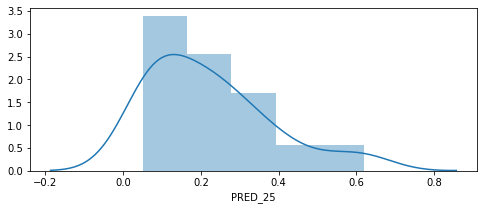

In [15]:
# t-test
hypothesisTest_Effort(c.LINE, "BUG", c.PRED_25, 0.33)

t-test for: Line
MODEL - number records: 31
mean:  0.37322580645161285
p-value:  2.5280203977459953e-07
Rejecting null hypothesis!


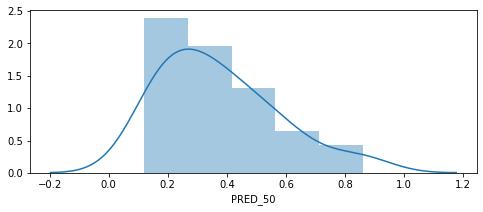

In [16]:
hypothesisTest_Effort(c.LINE, "BUG", c.PRED_50, 0.60)

t-test for: Module
MODEL - number records: 31
mean:  0.35
p-value:  3.209494202063526e-07
Rejecting null hypothesis!


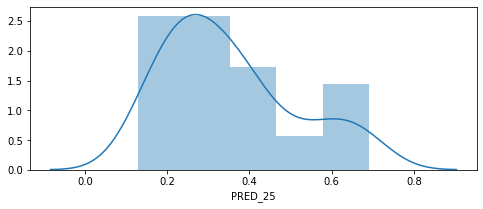

In [17]:
# t-test
hypothesisTest_Effort(c.MODULE, "BUG", c.PRED_25, 0.53)

t-test for: Module
MODEL - number records: 31
mean:  0.5458064516129033
p-value:  4.063236312952806e-11
Rejecting null hypothesis!


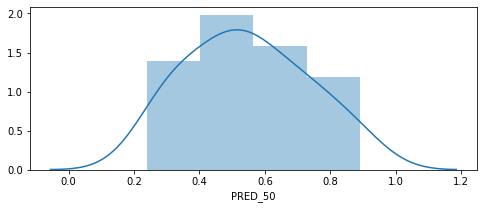

In [18]:
hypothesisTest_Effort(c.MODULE, "BUG", c.PRED_50, 0.87)